In [2]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [3]:
df.to_csv('module_5_auto.csv')

 First, let's only use numeric data:


In [4]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend([RedName, BlueName])
    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [8]:
y_data = df['price']

In [9]:
x_data=df.drop('price',axis=1)

In [38]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [11]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print('Number of testing samples:', x_test1.shape[0])
print('Number of training samples:', x_train1.shape[0])

Number of testing samples: 81
Number of training samples: 120


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lre=LinearRegression()

In [16]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [17]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [18]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [20]:
# Write your code below and press Shift+Enter to execute 
lre.fit(x_train1[['horsepower']], y_train1)
r = lre.score(x_test1[['horsepower']], y_test1)
print('R^2 for the test data is:', r)

R^2 for the test data is: 0.7139364665406973


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [23]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [24]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [30]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [27]:
# Write your code below and press Shift+Enter to execute 
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print(Rcross1[1], Rcross1.mean())

0.44319612775502903 0.5166761697127429


In [28]:
from sklearn.model_selection import cross_val_predict

In [33]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [34]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [35]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [36]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

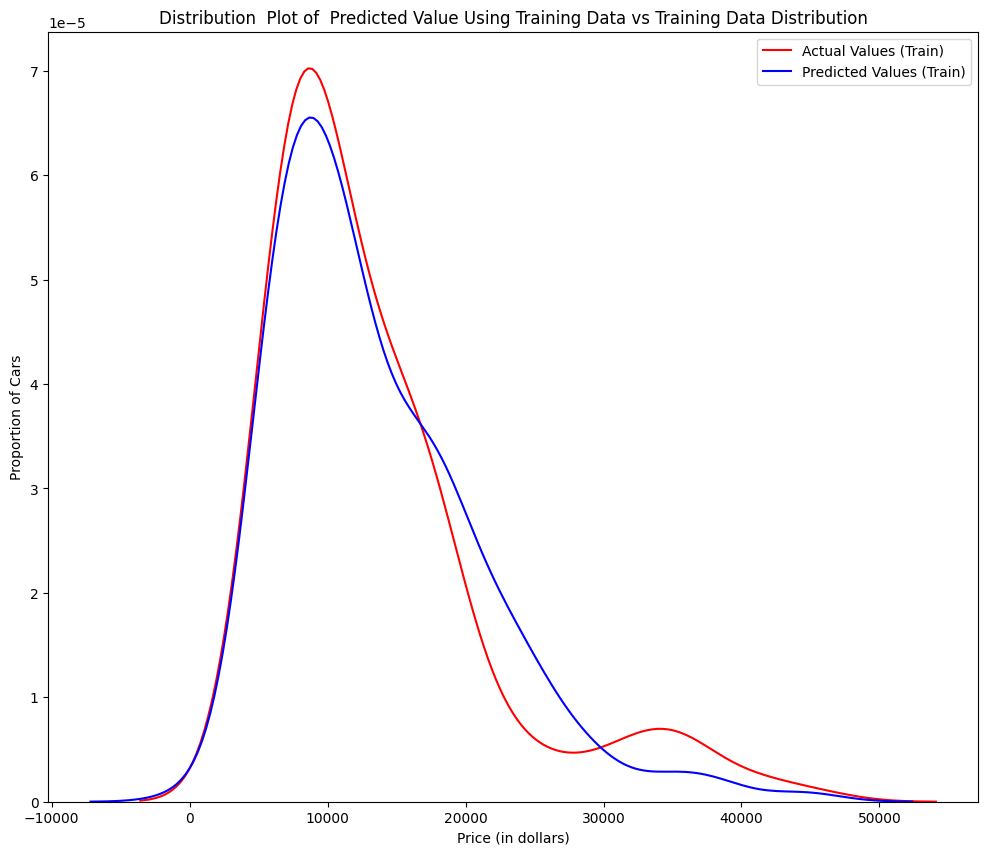

In [42]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

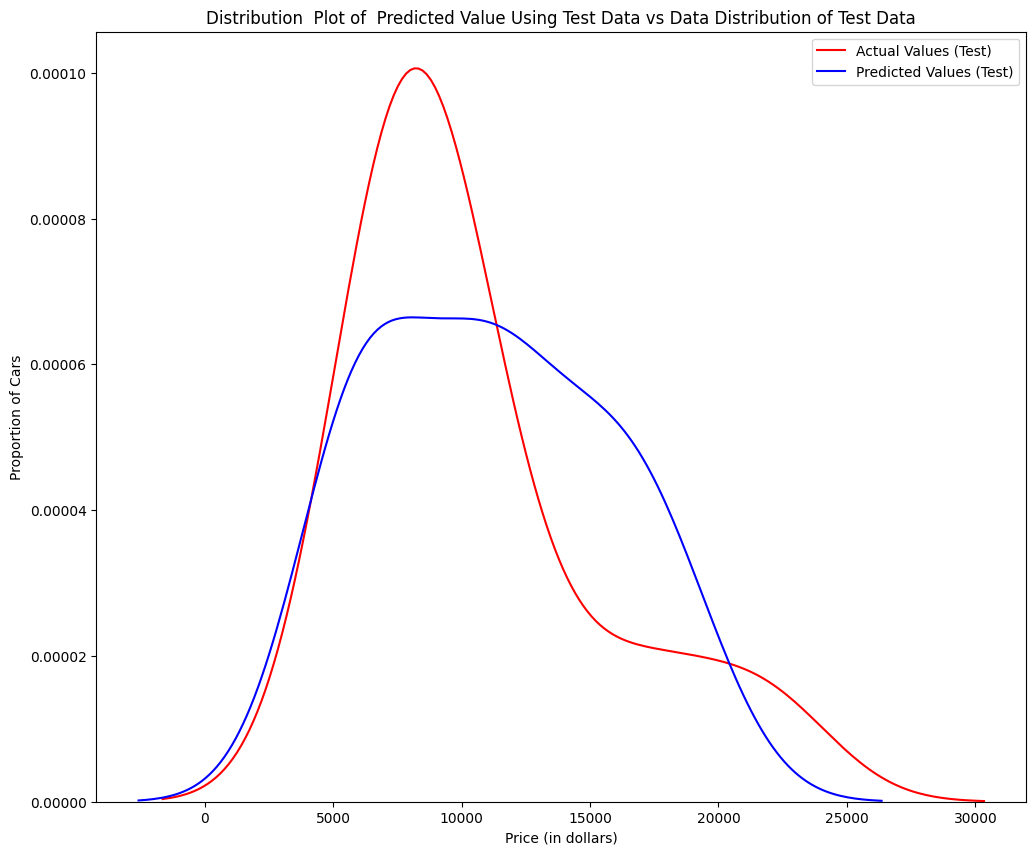

In [43]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [65]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [66]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [67]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.67965875,  7308.0119838 , 12213.80910478, 18893.1997037 ,
       19995.89349921])

In [68]:
print("Predicted values:", yhat[0:4].round(1))
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.7  7308.  12213.8 18893.2]
True values: [ 6295. 10698. 13860. 13499.]


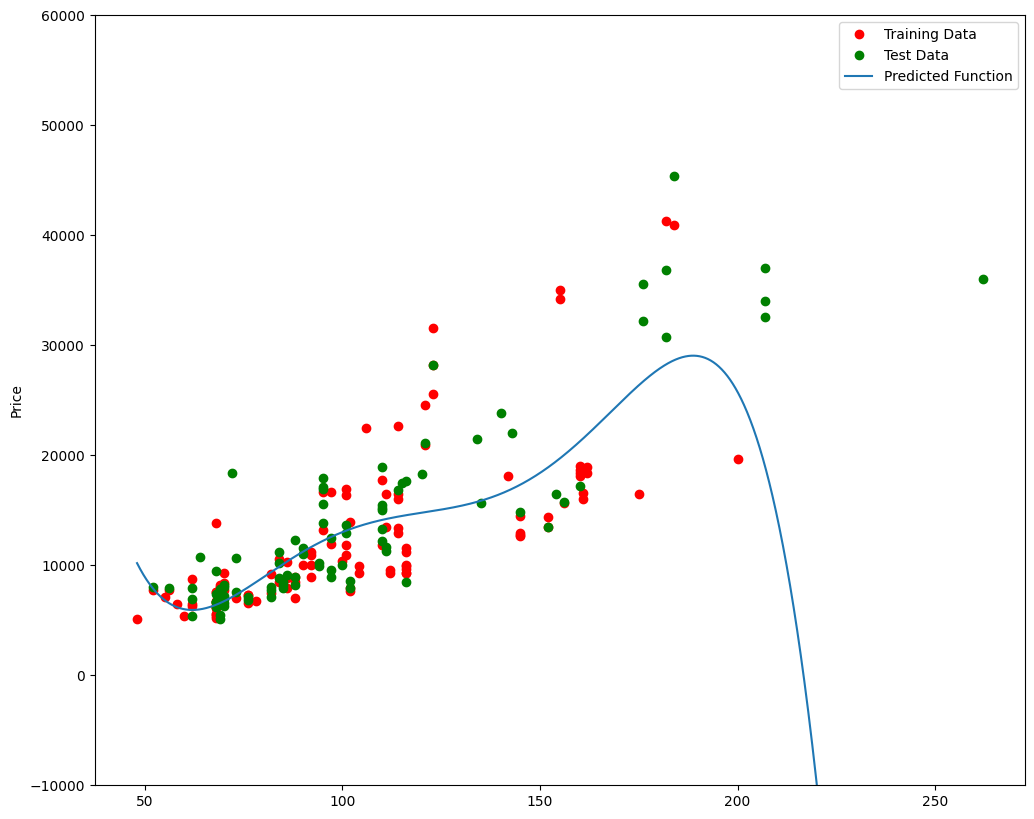

In [69]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [70]:
poly.score(x_train_pr, y_train)

0.5567716902513511

In [71]:
poly.score(x_test_pr, y_test)

-29.871476298381996

Text(3.11, 0.733, 'Maximum R^2 ')

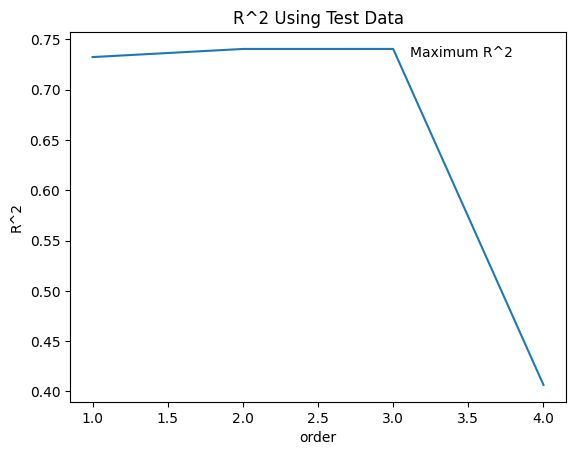

In [85]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3.11, 0.733, 'Maximum R^2 ')    

In [86]:
# Write your code below and press Shift+Enter to execute 
pr1 = PolynomialFeatures(degree=2)

In [87]:
# Write your code below and press Shift+Enter to execute 
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
pr1

PolynomialFeatures()

In [92]:
# Write your code below and press Shift+Enter to execute 
print('The training set is :', x_train_pr1.shape)
print('The testing set is :', x_test_pr1.shape)

The training set is : (110, 15)
The testing set is : (91, 15)


In [93]:
# Write your code below and press Shift+Enter to execute 
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

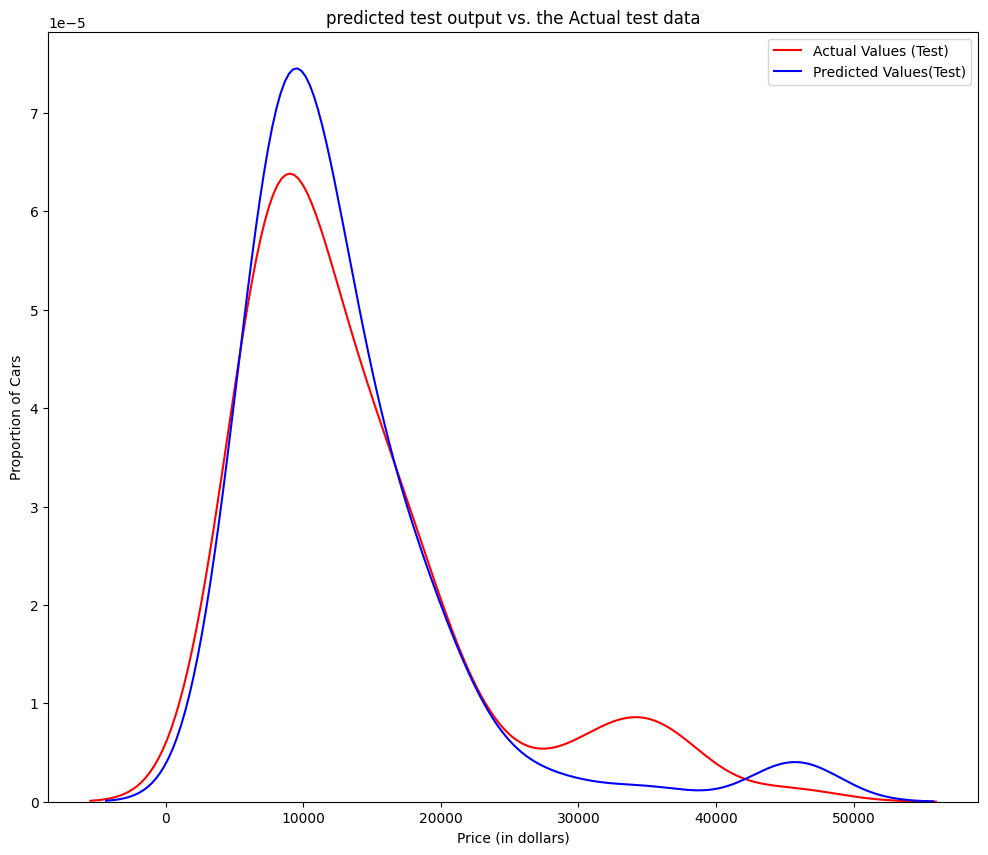

In [95]:
# Write your code below and press Shift+Enter to execute 
yhat1_test = poly1.predict(x_test_pr1)
Title = 'predicted test output vs. the Actual test data'
DistributionPlot(y_test, yhat1_test, 'Actual Values (Test)', 'Predicted Values(Test)', Title) 

In [97]:
# Write your code below and press Shift+Enter to execute 
print('According to figure 4 above, the predicted value is higher than actual value for cars where the price $10,000 range, \nconversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.')

According to figure 4 above, the predicted value is higher than actual value for cars where the price $10,000 range, 
conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.


In [98]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [99]:
from sklearn.linear_model import Ridge

In [100]:
RigeModel=Ridge(alpha=1)

In [101]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [102]:
yhat = RigeModel.predict(x_test_pr)

In [106]:
print('predicted:', yhat[0:4].round(1))
print('test set :', y_test[0:4].values)

predicted: [ 6570.8  9636.2 20949.9 19403.6]
test set : [ 6295. 10698. 13860. 13499.]


In [116]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 166.43it/s, Test Score=0.564, Train Score=0.859]


0.5637701868993107

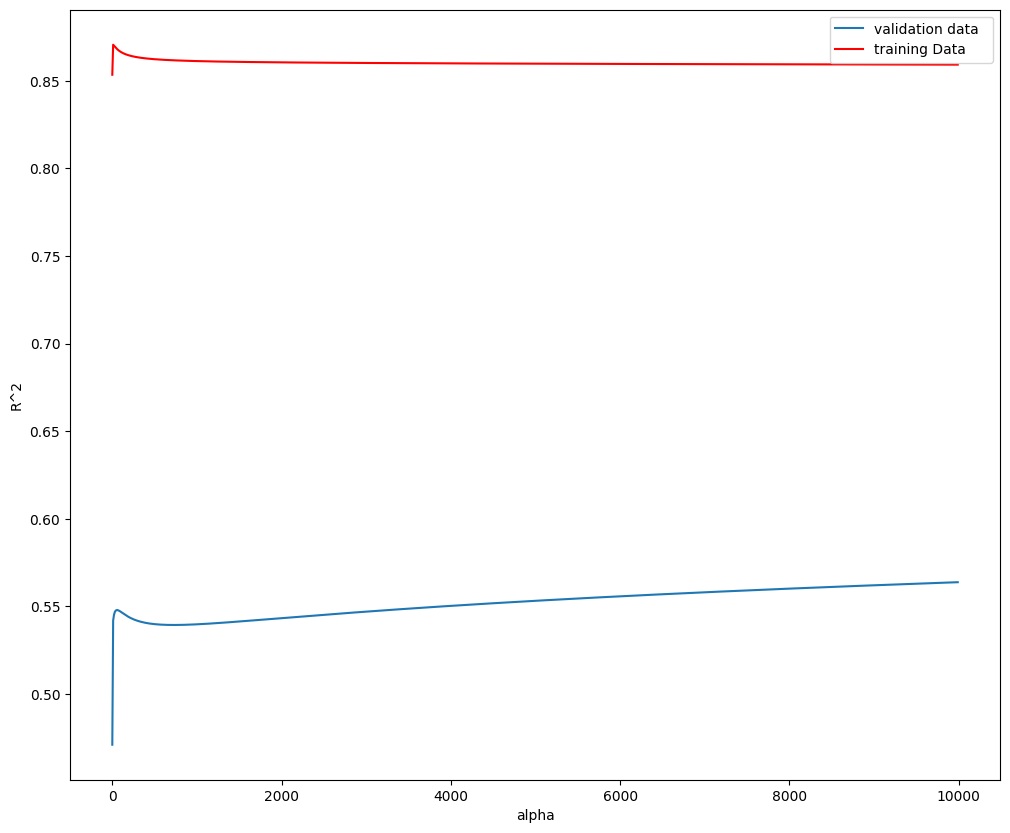

In [117]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [118]:
# Write your code below and press Shift+Enter to execute 
RigeModel1 = Ridge(alpha=10)
RigeModel.fit(x_train_pr1, y_train)
RigeModel.predict(x_test_pr1)
RigeModel.score(x_test_pr1, y_test)

0.6118275334847073

In [119]:
from sklearn.model_selection import GridSearchCV

In [124]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [125]:
RR=Ridge()
RR

Ridge()

In [126]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [127]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [128]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [129]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [135]:
# Write your code below and press Shift+Enter to execute 
RR = Ridge()
parameter = [{'alpha': [0, 10, 100, 1000, 10000, 100000, 1000000]}]
Grid2 = GridSearchCV(RR, parameter, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BA = Grid2.best_params_['alpha']
BRM = Ridge(alpha=BA)
BRM.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)